## Object detection with YOLOv3

Yolo needs OpenCV to work with images. 

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install opencv-python

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

We first load the weights, config files and COCO classes associated to the pretrained model.

In [2]:
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [3]:
classes = []
with open("coco.names","r") as file:
    classes = [line.strip() for line in file.readlines()]

In [4]:
layer_names = yolo.getLayerNames()
outputlayers = [layer_names[i[0] -1] for i in yolo.getUnconnectedOutLayers()]

In [5]:
colorRed   = (0, 0, 255)
colorGreen = (0, 255, 0)

In [10]:
# loading the image
name = "image.jpg"
img = cv2.imread(name)
height, width, channels = img.shape

The preview of the image has wrong colors because of the ```imshow``` function. 

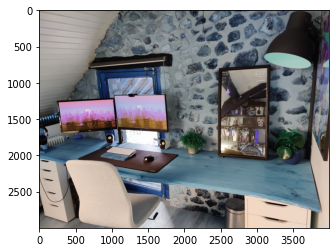

In [11]:
plt.imshow(img)

In [13]:
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)

In [14]:
yolo.setInput(blob)

In [15]:
outputs = yolo.forward(outputlayers)

In [16]:
class_ids = []
confidences = []
boxes = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if (confidence > 0.5):
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [17]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [18]:
for i in range(len(boxes)):
    if i in indices:
        x, y, w, h = boxes[i]
        label =str(classes[class_ids[i]])
        start = (x,y)
        end = (x+w,y+h)
        cv2.rectangle(img, start, end, (0,255,0), 4)
        cv2.putText(img, label, (x,y-20), cv2.FONT_HERSHEY_PLAIN, 5, colorRed, 4)

The new image is created with bouding boxes and object class names.

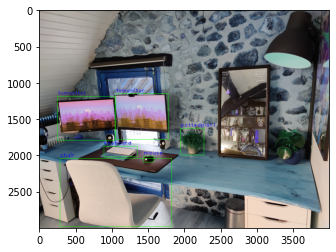

In [19]:
plt.imshow(img)

In [20]:
cv2.imwrite("output.jpg", img)

True